===== Basel III/IV Capital Requirement Report =====
Total RWA: 6,200,000.00
Tier 1 Capital: 900,000.00
Tier 2 Capital: 200,000.00
Capital Adequacy Ratio (CAR): 17.74%
Capital adequacy met.


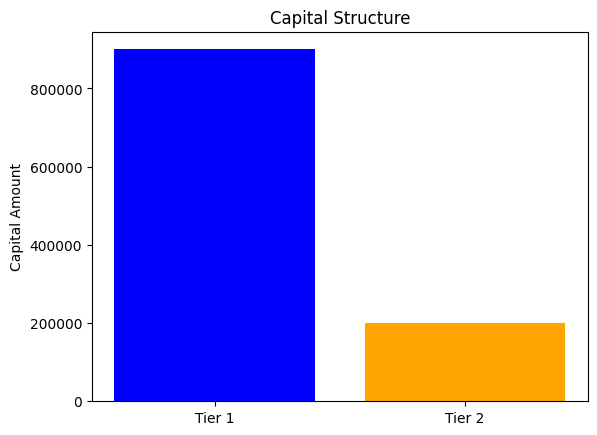

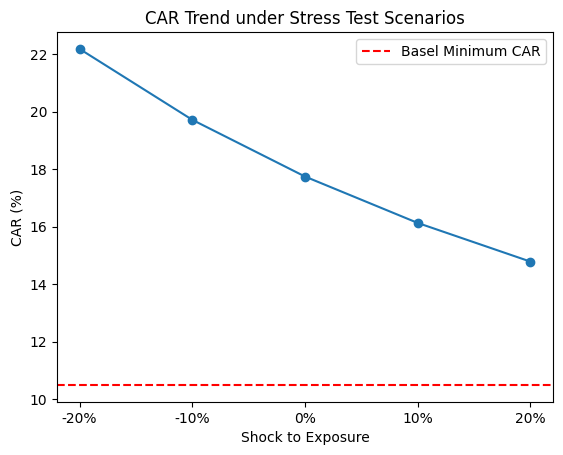

In [4]:
# ============================
# Basel III/IV Capital Requirement Calculator
# ============================

# --- 1. Intro to Basel III/IV ---
"""
Basel III and Basel IV are global banking regulations developed by the Basel Committee on Banking Supervision (BCBS).
Their main objective is to strengthen bank capital requirements and promote stability in the financial system.

Key Requirements:
- Minimum Capital Adequacy Ratio (CAR) of 10.5%
- Capital consists of Tier 1 (Core) and Tier 2 (Supplementary) capital.
- Risk-Weighted Assets (RWA) are calculated by applying risk weights to asset exposures.

Formula:
    CAR (%) = (Tier 1 Capital + Tier 2 Capital) / Risk-Weighted Assets × 100
"""

# --- 2. Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt

# --- 3. Load Example Dataset ---
# data = pd.read_csv("example_data.csv") # Commented out the line that caused the error
# display(data) # Commented out the display line as df is already displayed

# --- 4. BaselCalculator Class ---
class BaselCalculator:
    def __init__(self, data):
        """
        data: DataFrame with columns ['Asset', 'Exposure', 'Risk_Weight', 'Tier1_Capital', 'Tier2_Capital']
        """
        self.data = data # Use the passed-in DataFrame

    def calculate_rwa(self):
        self.data['RWA'] = self.data['Exposure'] * self.data['Risk_Weight']
        total_rwa = self.data['RWA'].sum()
        return total_rwa

    def calculate_capital(self):
        tier1 = self.data['Tier1_Capital'].sum()
        tier2 = self.data['Tier2_Capital'].sum()
        return tier1, tier2

    def calculate_car(self):
        total_rwa = self.calculate_rwa()
        tier1, tier2 = self.calculate_capital()
        total_capital = tier1 + tier2
        car = (total_capital / total_rwa) * 100 if total_rwa > 0 else 0
        return car

    def capital_shortfall(self, min_car=10.5):
        car = self.calculate_car()
        if car < min_car:
            shortfall_amount = (min_car - car) / 100 * self.calculate_rwa()
            return f"Capital shortfall detected! Increase capital by {shortfall_amount:,.2f}."
        else:
            return "Capital adequacy met."

    def report(self):
        print("===== Basel III/IV Capital Requirement Report =====")
        print(f"Total RWA: {self.calculate_rwa():,.2f}")
        t1, t2 = self.calculate_capital()
        print(f"Tier 1 Capital: {t1:,.2f}")
        print(f"Tier 2 Capital: {t2:,.2f}")
        print(f"Capital Adequacy Ratio (CAR): {self.calculate_car():.2f}%")
        print(self.capital_shortfall())

    def plot_capital_structure(self):
        t1, t2 = self.calculate_capital()
        plt.bar(["Tier 1", "Tier 2"], [t1, t2], color=["blue", "orange"])
        plt.title("Capital Structure")
        plt.ylabel("Capital Amount")
        plt.show()

# --- 5. Run the BaselCalculator ---
calc = BaselCalculator(df) # Pass the existing df DataFrame to the calculator
calc.report()
calc.plot_capital_structure()

# --- 6. Stress Testing: CAR Trend under Scenarios ---
def stress_test_scenarios(base_data, shocks):
    """
    shocks: list of percentage changes applied to exposure
    """
    car_results = []
    for shock in shocks:
        stressed_data = base_data.copy()
        stressed_data['Exposure'] *= (1 + shock)
        calc = BaselCalculator(stressed_data)
        car_results.append(calc.calculate_car())
    return car_results

# Define shocks (-20%, -10%, 0%, +10%, +20%)
shocks = [-0.2, -0.1, 0, 0.1, 0.2]
car_values = stress_test_scenarios(df, shocks) # Use the existing df DataFrame

# Plot CAR trends
plt.plot([f"{int(s*100)}%" for s in shocks], car_values, marker='o')
plt.axhline(10.5, color='red', linestyle='--', label="Basel Minimum CAR")
plt.title("CAR Trend under Stress Test Scenarios")
plt.xlabel("Shock to Exposure")
plt.ylabel("CAR (%)")
plt.legend()
plt.show()